In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/iPSC_scanpy/"

In [3]:
filename = paste0(mydir,'Cuomo2020.cluster_expression_markers.cluster2.tsv')
df0 = read.csv(filename, sep = "\t")
head(df0)

names,pvals,pvals_adj,logfoldchanges,scores,cluster_id,ensembl_gene_id,hgnc_symbol
ENSG00000152977_ZIC1,0.000000e+00,0.000000e+00,5.223554,44.32686,2,ENSG00000152977,ZIC1
ENSG00000171794_UTF1,4.888347e-309,1.372526e-305,5.161236,42.95228,2,ENSG00000171794,UTF1
ENSG00000168505_GBX2,8.179711e-318,4.593317e-314,4.338133,42.70763,2,ENSG00000168505,GBX2
ENSG00000087510_TFAP2C,9.543329e-315,3.572704e-311,3.619993,42.21874,2,ENSG00000087510,TFAP2C
ENSG00000198417_MT1F,7.004946e-293,1.573451e-289,4.939952,40.33395,2,ENSG00000198417,MT1F
ENSG00000164093_PITX2,5.487019e-248,7.379923e-245,5.067068,37.91035,2,ENSG00000164093,PITX2


In [4]:
#### v0

In [5]:
filename = paste0(mydir,'Sarkar2019.cluster_expression_markers.cluster2.tsv')
df1 = read.csv(filename, sep = "\t")
df1$ensembl_gene_id = df1$names
head(df1)

names,pvals,pvals_adj,logfoldchanges,scores,cluster_id,ensembl_gene_id
ENSG00000110492,0.000000e+00,0.000000e+00,0.9017377,45.93811,2,ENSG00000110492
ENSG00000166426,2.168760e-301,2.185135e-297,1.2323605,41.87468,2,ENSG00000166426
ENSG00000198417,4.955173e-246,3.328390e-242,1.6254359,36.85649,2,ENSG00000198417
ENSG00000125148,2.108466e-224,1.062193e-220,1.5340148,34.86892,2,ENSG00000125148
ENSG00000176014,1.771280e-201,5.948844e-198,1.0946892,32.74362,2,ENSG00000176014
ENSG00000110092,9.739693e-189,2.803779e-185,0.9947406,31.59857,2,ENSG00000110092


In [6]:
df = inner_join(df0,df1, by = c('ensembl_gene_id'), suffix = c(".Cuomo",".Sarkar"))
head(df)

Warning message:
“Column `ensembl_gene_id` joining factors with different levels, coercing to character vector”

names.Cuomo,pvals.Cuomo,pvals_adj.Cuomo,logfoldchanges.Cuomo,scores.Cuomo,cluster_id.Cuomo,ensembl_gene_id,hgnc_symbol,names.Sarkar,pvals.Sarkar,pvals_adj.Sarkar,logfoldchanges.Sarkar,scores.Sarkar,cluster_id.Sarkar
ENSG00000152977_ZIC1,0.000000e+00,0.000000e+00,5.223554,44.32686,2,ENSG00000152977,ZIC1,ENSG00000152977,6.001952e-96,2.325872e-93,1.9561045,21.64928,2
ENSG00000171794_UTF1,4.888347e-309,1.372526e-305,5.161236,42.95228,2,ENSG00000171794,UTF1,ENSG00000171794,1.014773e-176,2.556086e-173,2.2950571,30.50853,2
ENSG00000168505_GBX2,8.179711e-318,4.593317e-314,4.338133,42.70763,2,ENSG00000168505,GBX2,ENSG00000168505,3.943575e-54,3.802248e-52,1.8450098,15.85210,2
ENSG00000087510_TFAP2C,9.543329e-315,3.572704e-311,3.619993,42.21874,2,ENSG00000087510,TFAP2C,ENSG00000087510,3.970562e-28,1.363046e-26,0.9105303,11.10822,2
ENSG00000198417_MT1F,7.004946e-293,1.573451e-289,4.939952,40.33395,2,ENSG00000198417,MT1F,ENSG00000198417,4.955173e-246,3.328390e-242,1.6254359,36.85649,2
ENSG00000164093_PITX2,5.487019e-248,7.379923e-245,5.067068,37.91035,2,ENSG00000164093,PITX2,ENSG00000164093,6.269838e-61,7.345552e-59,1.7066220,16.87322,2


In [7]:
nrow(df)
cor(df$logfoldchanges.Cuomo, df$logfoldchanges.Sarkar)

[1] 10951

[1] 0.4009476

Warning message:
“Removed 10 rows containing missing values (geom_point).”

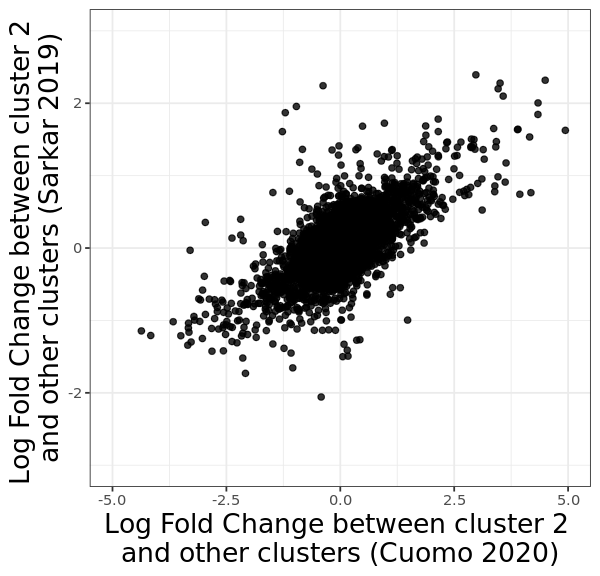

In [8]:
### v0 (all genes)
options(repr.plot.width=5, repr.plot.height=4.8)
ggplot(df, aes(x = logfoldchanges.Cuomo, y = logfoldchanges.Sarkar)) + geom_point(alpha = 0.8) + 
    xlab("Log Fold Change between cluster 2 \nand other clusters (Cuomo 2020)") + 
    ylab("Log Fold Change between cluster 2 \nand other clusters (Sarkar 2019)") + 
    xlim(c(-5,5)) + ylim(c(-3,3)) + theme_bw()  + theme(axis.title = element_text(size = 16))

In [9]:
df1 = df1[df1$pvals_adj<0.05,]
df = inner_join(df0,df1, by = c('ensembl_gene_id'), suffix = c(".Cuomo",".Sarkar"))
head(df)

Warning message:
“Column `ensembl_gene_id` joining factors with different levels, coercing to character vector”

names.Cuomo,pvals.Cuomo,pvals_adj.Cuomo,logfoldchanges.Cuomo,scores.Cuomo,cluster_id.Cuomo,ensembl_gene_id,hgnc_symbol,names.Sarkar,pvals.Sarkar,pvals_adj.Sarkar,logfoldchanges.Sarkar,scores.Sarkar,cluster_id.Sarkar
ENSG00000152977_ZIC1,0.000000e+00,0.000000e+00,5.223554,44.32686,2,ENSG00000152977,ZIC1,ENSG00000152977,6.001952e-96,2.325872e-93,1.9561045,21.64928,2
ENSG00000171794_UTF1,4.888347e-309,1.372526e-305,5.161236,42.95228,2,ENSG00000171794,UTF1,ENSG00000171794,1.014773e-176,2.556086e-173,2.2950571,30.50853,2
ENSG00000168505_GBX2,8.179711e-318,4.593317e-314,4.338133,42.70763,2,ENSG00000168505,GBX2,ENSG00000168505,3.943575e-54,3.802248e-52,1.8450098,15.85210,2
ENSG00000087510_TFAP2C,9.543329e-315,3.572704e-311,3.619993,42.21874,2,ENSG00000087510,TFAP2C,ENSG00000087510,3.970562e-28,1.363046e-26,0.9105303,11.10822,2
ENSG00000198417_MT1F,7.004946e-293,1.573451e-289,4.939952,40.33395,2,ENSG00000198417,MT1F,ENSG00000198417,4.955173e-246,3.328390e-242,1.6254359,36.85649,2
ENSG00000164093_PITX2,5.487019e-248,7.379923e-245,5.067068,37.91035,2,ENSG00000164093,PITX2,ENSG00000164093,6.269838e-61,7.345552e-59,1.7066220,16.87322,2


In [10]:
nrow(df)
cor(df$logfoldchanges.Cuomo, df$logfoldchanges.Sarkar)

[1] 5397

[1] 0.7415552

Warning message:
“Removed 4 rows containing missing values (geom_point).”

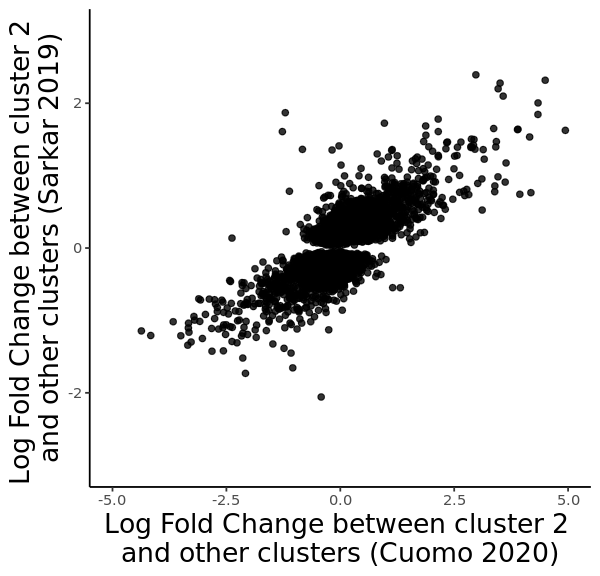

In [12]:
### significant genes in Sarkar p_adj<0.05
options(repr.plot.width=5, repr.plot.height=4.8)
ggplot(df, aes(x = logfoldchanges.Cuomo, y = logfoldchanges.Sarkar)) + geom_point(alpha = 0.8) + 
    xlab("Log Fold Change between cluster 2 \nand other clusters (Cuomo 2020)") + 
    ylab("Log Fold Change between cluster 2 \nand other clusters (Sarkar 2019)") + 
    xlim(c(-5,5)) + ylim(c(-3,3)) + theme_classic()  + theme(axis.title = element_text(size = 16))

In [13]:
fig_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/figures/extended_figures/"

pdf(paste0(fig_dir,"Supp_Fig_5d.pdf"), width=5, height=4.8)
ggplot(df, aes(x = logfoldchanges.Cuomo, y = logfoldchanges.Sarkar)) + geom_point(alpha = 0.8) + 
    xlab("Log Fold Change between cluster 2 \nand other clusters (Cuomo 2020)") + 
    ylab("Log Fold Change between cluster 2 \nand other clusters (Sarkar 2019)") + 
    xlim(c(-5,5)) + ylim(c(-3,3)) + theme_classic()  + theme(axis.title = element_text(size = 16))
dev.off()

Warning message:
“Removed 4 rows containing missing values (geom_point).”

png 
  2